# boston House Price

## EDA
[step 1]데이터 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

- b: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.

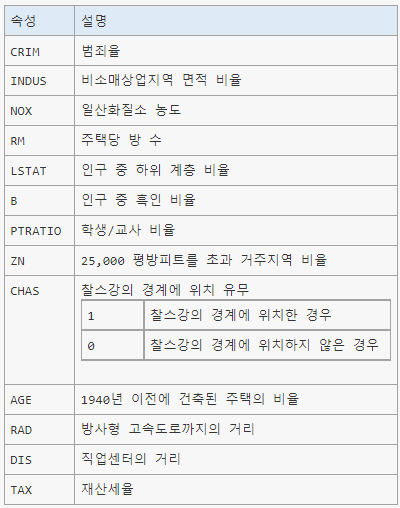

[Step 2] 데이터 탐색

In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# 데이터 통계 요약정보 확인
bostonDF.describe()

CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

[Step 3] 속성(feature 또는 variable) 선택

In [ ]:
bostonDF = bostonDF[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']]
bostonDF.head()

RM    ZN  INDUS    NOX   AGE  PTRATIO  LSTAT  RAD  PRICE
0  6.575  18.0   2.31  0.538  65.2     15.3   4.98  1.0   24.0
1  6.421   0.0   7.07  0.469  78.9     17.8   9.14  2.0   21.6
2  7.185   0.0   7.07  0.469  61.1     17.8   4.03  2.0   34.7
3  6.998   0.0   2.18  0.458  45.8     18.7   2.94  3.0   33.4
4  7.147   0.0   2.18  0.458  54.2     18.7   5.33  3.0   36.2

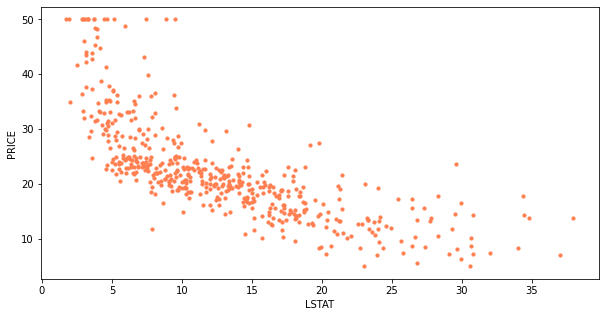

In [ ]:
bostonDF.plot(kind='scatter', x='LSTAT', y='PRICE',  
         c='coral', s=10, figsize=(10, 5))
plt.show()

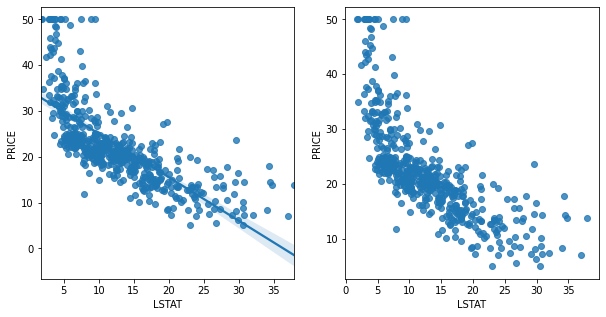

In [ ]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='LSTAT', y='PRICE', data=bostonDF, ax=ax1)# 회귀선 표시
sns.regplot(x='LSTAT', y='PRICE', data=bostonDF, ax=ax2, 
            fit_reg=False)  #회귀선 미표시
plt.show()

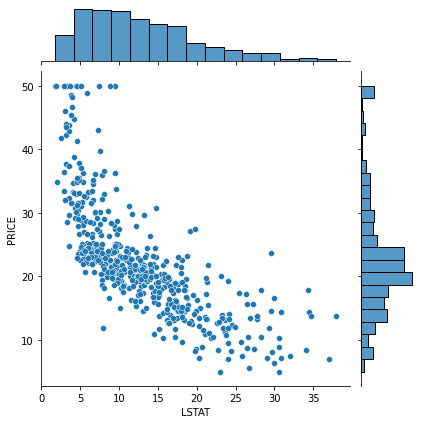

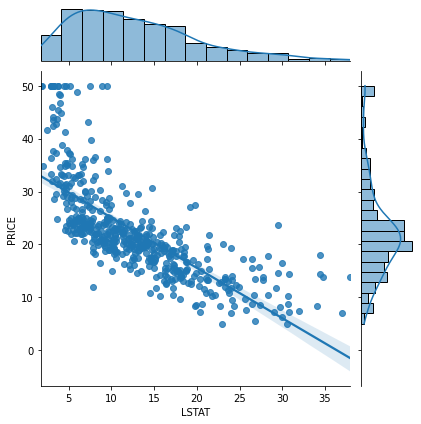

In [ ]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='LSTAT', y='PRICE', data=bostonDF)              # 회귀선 없음
sns.jointplot(x='LSTAT', y='PRICE', data=bostonDF, kind='reg')  # 회귀선 표시
plt.show()

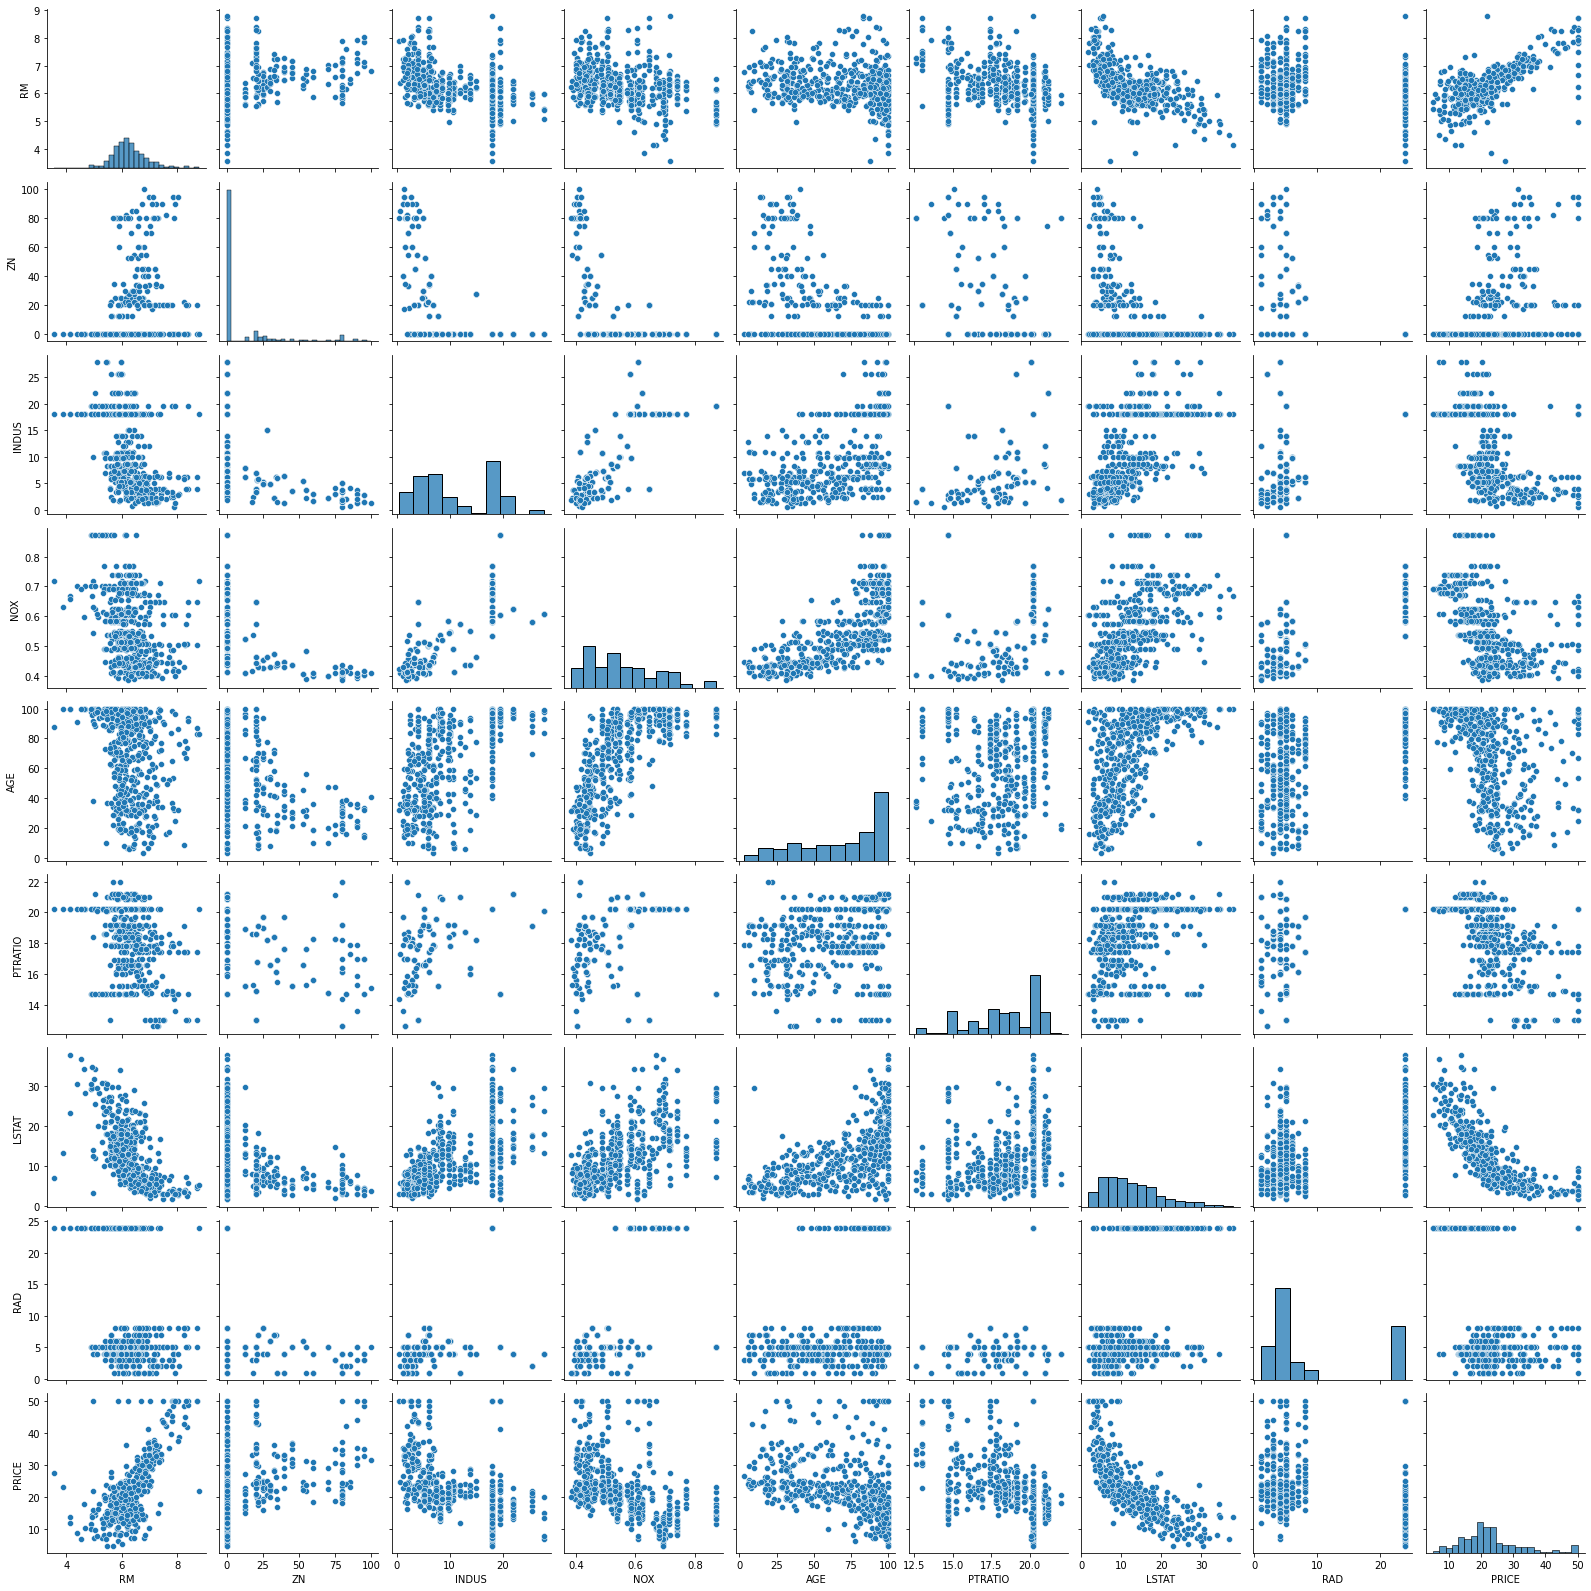

In [ ]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(bostonDF)  
plt.show()

# 해보기
   

1. 단순 회귀 분석을 수행하세요.   
  - 특성은 원하는 것 하나 선택 하세요.   
   

2. 다항회귀 분석을 수행하세요 (degree=2)   
  - 특성은 위에서 선택한 특성 사용    
   
   
3. 다중회귀 분석을 수행하세요.
  - 특성은 ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']를 사용하세요.
